# Homework 2 (R)

_Data anlysis in R and Python_



## Installation of kernel for JuputerLab in virtualenv

__Here are my notes my future *self*.__

The IRKernel documentation can be found [here] (https://irkernel.github.io/docs/IRkernel/), but I wanted to install the kernel withouc conda and place it   in my own virtual anevironemnt. The reason is I dont have jupyterlab installed in globally but I install it individually per virtual environment.
My main virtual environment which I use for writing notes and experimantation is located in `C:/Users/dlanda/Projects/Personal/.venv/`
Open the R console in RStudio or terminal and run these commands:

- `install.packages('IRkernel')`
- `setwd("C:/Users/dlanda/Projects/Personal/.venv/Scripts")`
- `IRkernel::installspec(user = FALSE)` -> `[InstallKernelSpec] Installed kernelspec ir in C:\ProgramData\jupyter\kernels\ir`

Anyway kernels and settings for JupyterLab are installed gloally in `C:\ProgramData\jupyter` so it is  accesibble for all jupyterlabs installed in virtual environments. 

The kernel should be visible in the menu:




## Problem

The file `sazava.data` contains whole-rock major- and trace-element analyses for granitoid rocks from the Variscan Sázava suite of the Central Bohemian Plutonic Complex.sazava.data 

Solve the following steps:

1. Read into matrix `WR` analyses stored in tab delimited data file `sazava.tsv`. 

2. Display a table with three columns: SiO<sub>2</sub>, MgO and Na<sub>2</sub>O/K<sub>2</sub>O. Use the function `cbind` with the right column names.

3. Display a binary plot with for all the combinations of the following oxides: 
  SiO<sub>2</sub>, MgO, FeO, Fe<sub>2</sub>O<sub>3</sub>, CaO, P<sub>2</sub>O<sub>5</sub> 

4. Display a binary plot SiO<sub>2</sub>–CaO
  choose suitable ranges for the x and y axes, label them and annotate plotted data points by sample names. 
  
  Plot two versions, in one all the data points as dark blue squares, in the second assign the plotting symbols according to individual rock types (utilizing the data in the column `WR[,”Symbol”]`). Plot the line SiO<sub>2</sub>/CaO = 10 passing through the origin.

5. Display box plot denoting distribution of strontium, and find out all the main statistical parameters characterizing its distribution (the range, median, number of observations and not determined cases, …). Plot the Sr data also as a frequency histogram.

6. Create a matrix `x` containing only samples whose SiO<sub>2</sub> > 55 

7. Display a binary plot SiO<sub>2</sub>–CaO for these samples 

  (set double size of the plotting symbols) and fit the data points by a straight line using the least squares linear regression.

*NB* Setting the final size of the graphical window to 5 by 5 in Jupyter notebook for aesthetics sake:

In [81]:
options(repr.plot.width=10, repr.plot.height=10)

## Solution

In [114]:
# 1
data <- read.table("./sazava.data", sep="\t")

In [115]:
# 2 
# Select the columns and give them names with basic `cbind` function.
cols <- cbind(SiO2 = data$SiO2, MgO = data$MgO, NaO = data$Na2O, K2O = data$K2O)

In [117]:
# Show the table (print).
cols

SiO2,MgO,NaO,K2O
59.98,3.21,2.52,2.50
55.17,3.67,3.36,1.70
55.09,3.52,2.83,2.04
50.72,5.18,2.83,1.60
57.73,2.82,2.54,1.67
52.90,3.89,2.76,1.45
49.63,8.59,1.67,1.07
51.72,7.47,1.97,1.38
48.84,5.11,1.78,0.83
55.80,3.16,3.07,1.45


In [118]:
as.matrix(data)

,Intrusion,Locality,Petrology,Outcrop,Symbol,Colour,SiO2,TiO2,Al2O3,FeO,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Cs,Ta,Hf
Sa-1,Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,59.98,0.63,16.42,5.46,...,NA,NA,NA,NA,NA,NA,25,NA,NA,NA
Sa-2,Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,55.17,0.71,17.00,5.26,...,NA,NA,NA,NA,NA,NA,30,NA,NA,NA
Sa-3,Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,55.09,0.75,17.59,5.81,...,NA,NA,NA,NA,NA,NA,30,NA,NA,NA
Sa-4,Sazava,Mrac,bi-amph quartz diorite,working quarry,10,4,50.72,0.83,17.57,7.65,...,5.80,1.03,2.80,0.43,2.88,0.43,38,5.7,0.5,2.5
Sa-7,Sazava,Teletín,bi-amph tonalite,disused quarry,10,1,57.73,0.95,18.82,5.43,...,2.70,0.56,1.64,0.24,1.52,0.25,24,6.6,0.6,3.6
SaD-1,basic,Teletín,bi-amph quartz diorite,disused quarry,8,1,52.90,1.35,18.23,7.24,...,NA,NA,NA,NA,NA,NA,36,2.3,1.1,1.8
Gbs-1,basic,Pecerady,px-amph gabbro,disused quarry,19,1,49.63,0.76,13.34,5.69,...,NA,NA,NA,NA,NA,NA,20,NA,NA,NA
Gbs-20,basic,Pecerady,px-amph gabbro,disused quarry,19,1,51.72,0.67,14.17,6.43,...,NA,NA,NA,NA,NA,NA,19,NA,NA,NA
Gbs-2,basic,Vavretice,amph-bi qtz gabbrodiorite,disused quarry,19,1,48.84,0.34,21.64,2.74,...,NA,NA,NA,NA,NA,NA,10,NA,NA,NA
Gbs-3,basic,Brtnice,amph-bi qtz gabbrodiorite,water supply gallery,19,1,55.80,0.80,16.98,6.22,...,NA,NA,NA,NA,NA,NA,42,NA,NA,NA


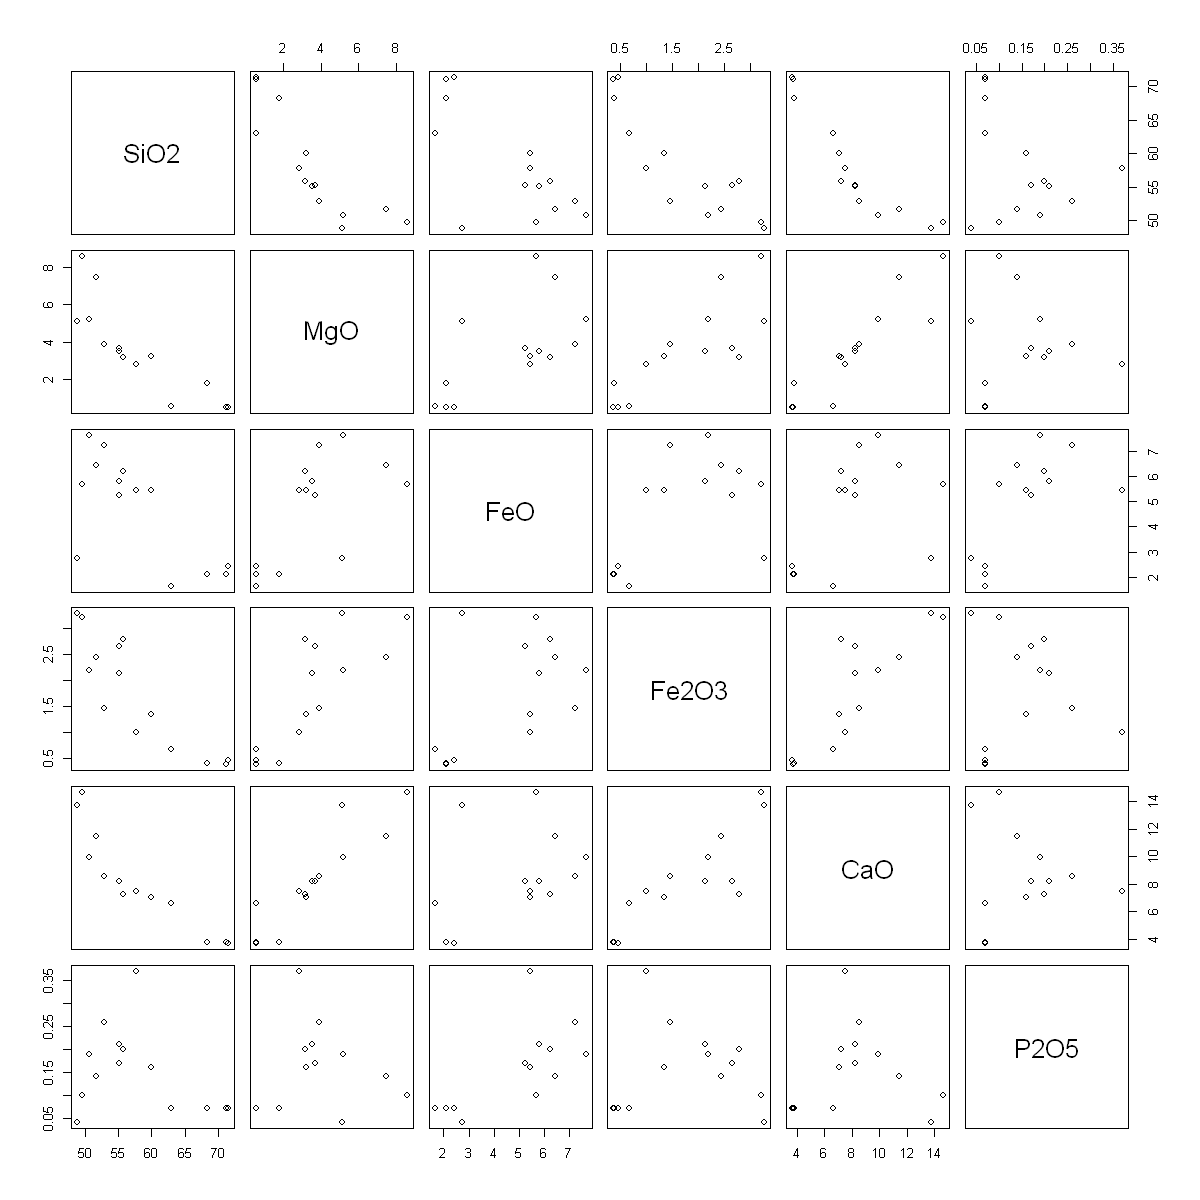

In [106]:
# 3
pairs(cbind(SiO2 = df$SiO2, MgO = df$MgO , FeO = df$FeO, Fe2O3 = df$Fe2O3, CaO = df$CaO, P2O5 = df$P2O5))

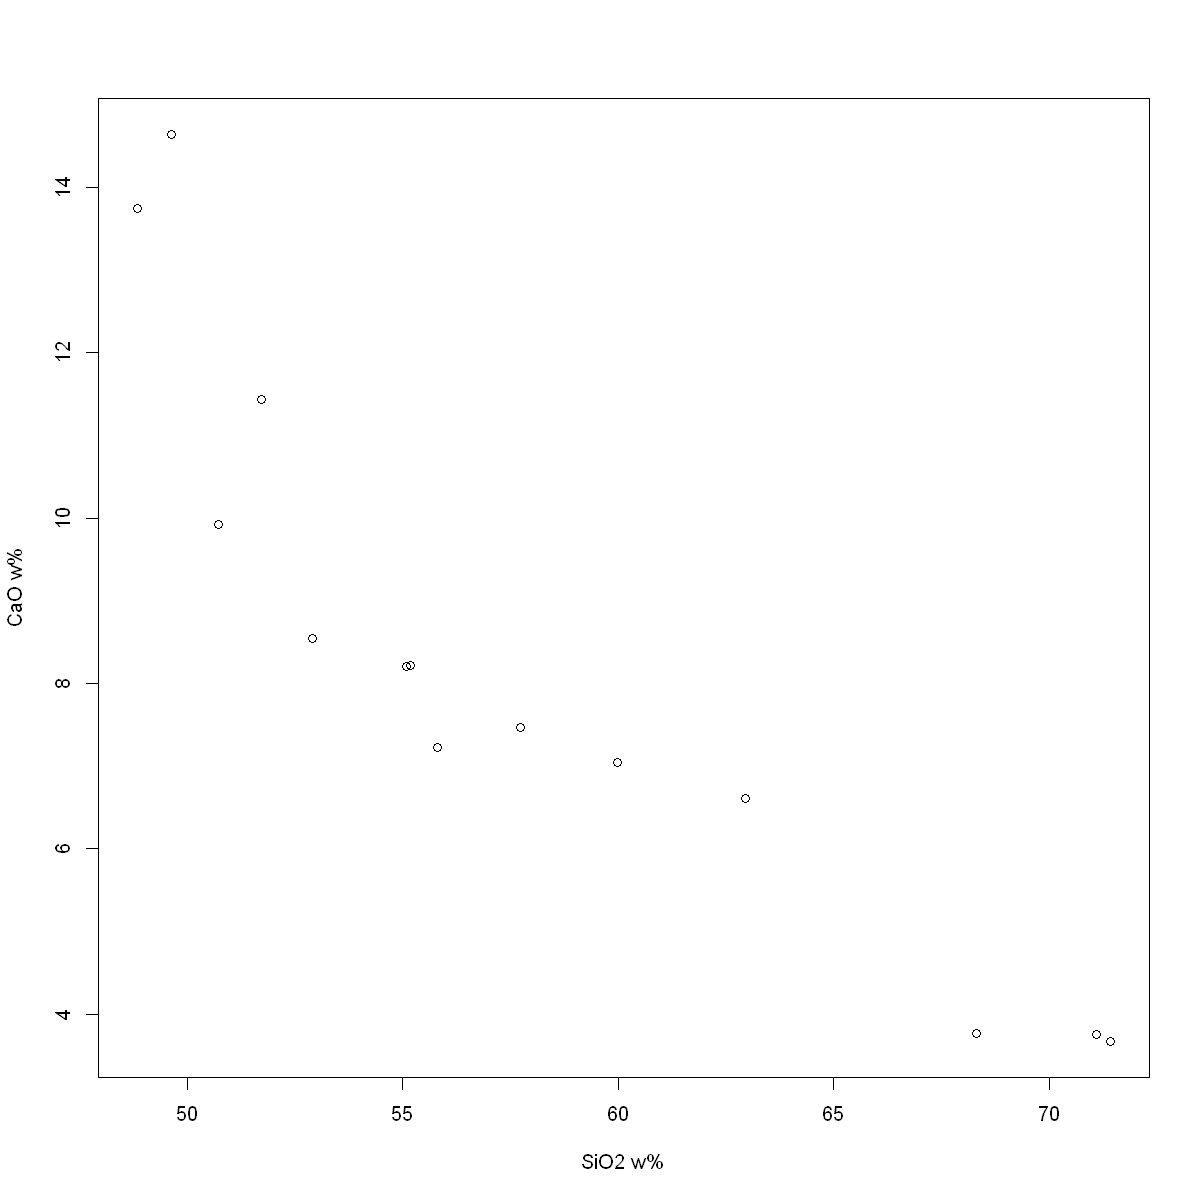

In [87]:
# 4
plot(data$SiO2, data$CaO, xlab="SiO2 w%", ylab="CaO w%")